# MSDS 430 Final


### For the project I am using a set of data containing information about the performance of online ad camplains.  With the help of Python my goal is to reveal which campaign performed best. I want to expolore which demographics responded best to the campaigns, how much did they spend and what was the conversion rate. The purpose of the results is to be better informed for further building of new ad campaigns that are better targeted and will have greater success.

##### Data source: https://www.kaggle.com/loveall/clicks-conversion-tracking
##### Pandas Info: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

In [84]:
df = pd.read_csv('KAG_conversion_data.csv')

In [85]:
df.head(21)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [126]:
df.shape

(1143, 11)

### Looking at data spread for age and gender demographics. What we see is that the age group that shops the most is 30-34. Genders are represented almost equaly. 

In [86]:
df['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [87]:
df['gender'].value_counts()

M    592
F    551
Name: gender, dtype: int64

### Check statistics

In [88]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


## Look at best performing ads using sum calculation

In [89]:
df['ad_id'].value_counts().head()

1122303    1
1121141    1
1121131    1
1121132    1
1121133    1
Name: ad_id, dtype: int64

In [90]:
ad_df = df.groupby("ad_id")["Approved_Conversion"].sum().sort_values(ascending=False)
ad_df.head()

ad_id
1121104    21
1121100    17
1121108    14
1121091    14
1121814    13
Name: Approved_Conversion, dtype: int64

In [91]:
ad_df = df.groupby("ad_id")["Spent"].sum().sort_values(ascending=False)
ad_df.head()

ad_id
1121100    639.949998
1121814    612.300003
1121601    603.380002
1122265    541.700002
1122193    465.079998
Name: Spent, dtype: float64

### XYZ Campaign 1178 performed the best, but it also ran the most times

In [92]:
df['xyz_campaign_id'].value_counts().head()

1178    625
936     464
916      54
Name: xyz_campaign_id, dtype: int64

In [93]:
xyz_df = df.groupby("xyz_campaign_id")["Approved_Conversion"].sum().sort_values(ascending=False)
xyz_df.head()

xyz_campaign_id
1178    872
936     183
916      24
Name: Approved_Conversion, dtype: int64

In [94]:
xyz_df = df.groupby("xyz_campaign_id")["Spent"].sum().sort_values(ascending=False)
xyz_df.head()

xyz_campaign_id
1178    55662.149959
936      2893.369999
916       149.710001
Name: Spent, dtype: float64

In [95]:
df['fb_campaign_id'].value_counts().head()

144636    6
144562    6
144674    6
144536    6
144611    6
Name: fb_campaign_id, dtype: int64

In [96]:
fb_df = df.groupby("fb_campaign_id")["Approved_Conversion"].sum().sort_values(ascending=False)
fb_df.head()

fb_campaign_id
144533    37
144532    31
144554    29
144531    24
144636    21
Name: Approved_Conversion, dtype: int64

In [97]:
fb_df = df.groupby("fb_campaign_id")["Spent"].sum().sort_values(ascending=False)
fb_df.head()

fb_campaign_id
144624    1425.450004
144674    1350.059995
144734    1331.920000
144724    1229.860004
144722    1037.810004
Name: Spent, dtype: float64

### Facebook interest group 16 had the most campaigns and spending

In [98]:
df['interest'].value_counts().head()

16    140
10     85
29     77
27     60
15     51
Name: interest, dtype: int64

In [99]:
interest_df = df.groupby("interest")["Spent"].sum().sort_values(ascending=False)
interest_df.head()

interest
16    8084.909990
27    5176.169992
10    5086.379995
29    5045.190008
28    3205.850004
Name: Spent, dtype: float64

### Age group 45-49 had most clicks and spending, but group 30-34 had most conversions

In [100]:
age_df = df.groupby("age")["Clicks"].sum().sort_values(ascending=False)
age_df

age
45-49    13852
30-34     9483
40-44     7736
35-39     7094
Name: Clicks, dtype: int64

In [101]:
age_df = df.groupby("age")["Impressions"].sum().sort_values(ascending=False)
age_df

age
30-34    67993019
45-49    63732858
35-39    42104644
40-44    39604307
Name: Impressions, dtype: int64

In [102]:
age_df = df.groupby("age")["Approved_Conversion"].sum().sort_values(ascending=False)
age_df

age
30-34    494
45-49    208
35-39    207
40-44    170
Name: Approved_Conversion, dtype: int64

In [103]:
age_df = df.groupby("age")["Total_Conversion"].sum().sort_values(ascending=False)
age_df

age
30-34    1431
45-49     684
35-39     626
40-44     523
Name: Total_Conversion, dtype: int64

In [104]:
age_df = df.groupby("age")["Spent"].sum().sort_values(ascending=False)
age_df

age
45-49    20750.669997
30-34    15252.399986
40-44    11589.729981
35-39    11112.429994
Name: Spent, dtype: float64

### Females clicked more, had more impressions, spent more, but men had more approved conversions (so they spent less money)

In [105]:
gender_df = df.groupby("gender")["Clicks"].sum().sort_values(ascending=False)
gender_df

gender
F    23878
M    14287
Name: Clicks, dtype: int64

In [106]:
gender_df = df.groupby("gender")["Impressions"].sum().sort_values(ascending=False)
gender_df

gender
F    114862847
M     98571981
Name: Impressions, dtype: int64

In [107]:
gender_df = df.groupby("gender")["Spent"].sum().sort_values(ascending=False)
gender_df

gender
F    34502.619963
M    24202.609995
Name: Spent, dtype: float64

In [108]:
gender_df = df.groupby("gender")["Total_Conversion"].sum().sort_values(ascending=False)
gender_df

gender
F    1644
M    1620
Name: Total_Conversion, dtype: int64

In [109]:
gender_df = df.groupby("gender")["Approved_Conversion"].sum().sort_values(ascending=False)
gender_df

gender
M    584
F    495
Name: Approved_Conversion, dtype: int64

Step 4 (5 pts.): Use matplotlib to create at least two visual displays relevant to your final project. Explain your graphs by including comments within your code. Your displays should be labeled clearly and appropriately scaled.

### Look at correlation diagram for any insights

In [121]:
corr = df.corr(method='pearson')

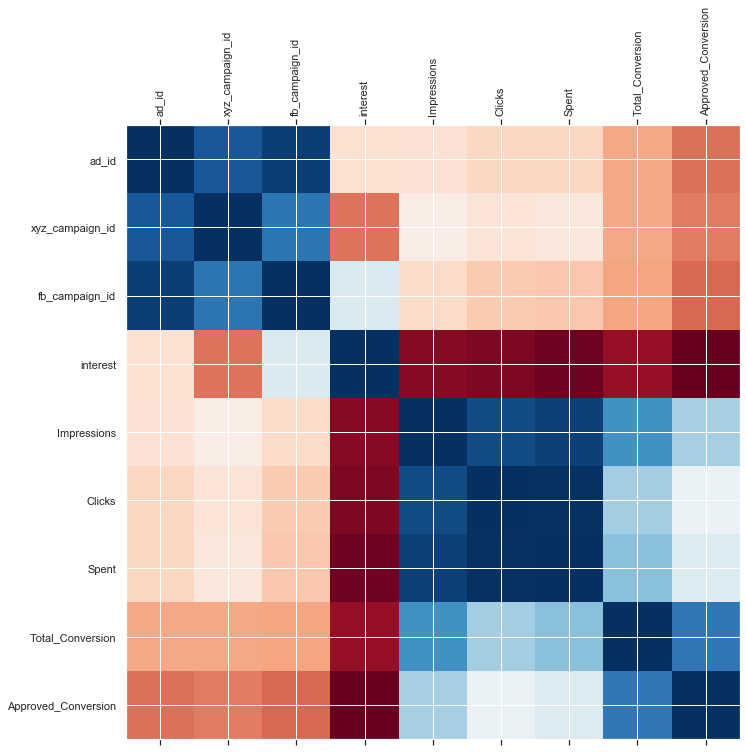

In [122]:
fig = plt.figure(figsize=(11,11))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

## Looking at individual variables

In [110]:
df["Approved_Conversion"].describe()

count    1143.000000
mean        0.944007
std         1.737708
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        21.000000
Name: Approved_Conversion, dtype: float64

### The average person had either 0 or 1 conversions, anything over 2 is probably an outlier

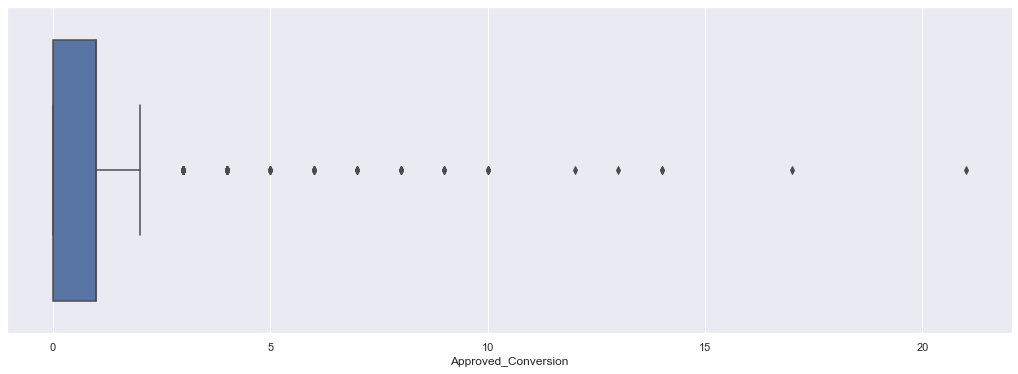

In [111]:
sns.boxplot(df['Approved_Conversion'])

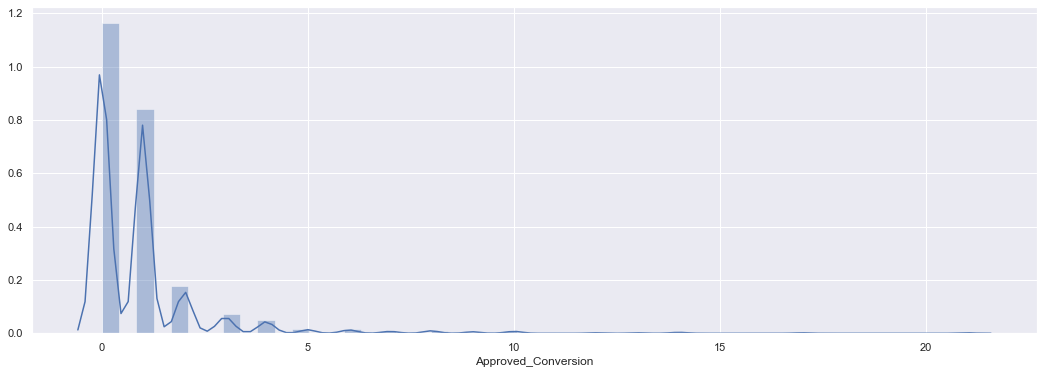

In [112]:
sns.distplot(df['Approved_Conversion'])

### Average spending between 0 and 100 dollars, several outliers though

In [113]:
df["Spent"].describe()

count    1143.000000
mean       51.360656
std        86.908418
min         0.000000
25%         1.480000
50%        12.370000
75%        60.025000
max       639.949998
Name: Spent, dtype: float64

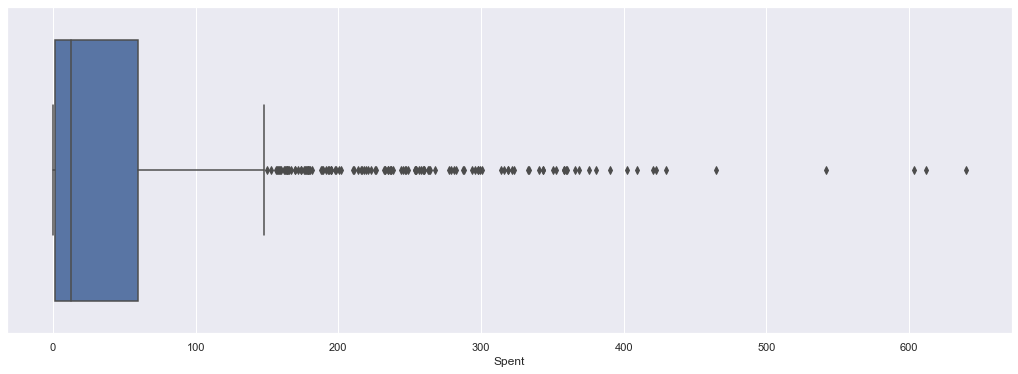

In [114]:
sns.boxplot(df['Spent'])

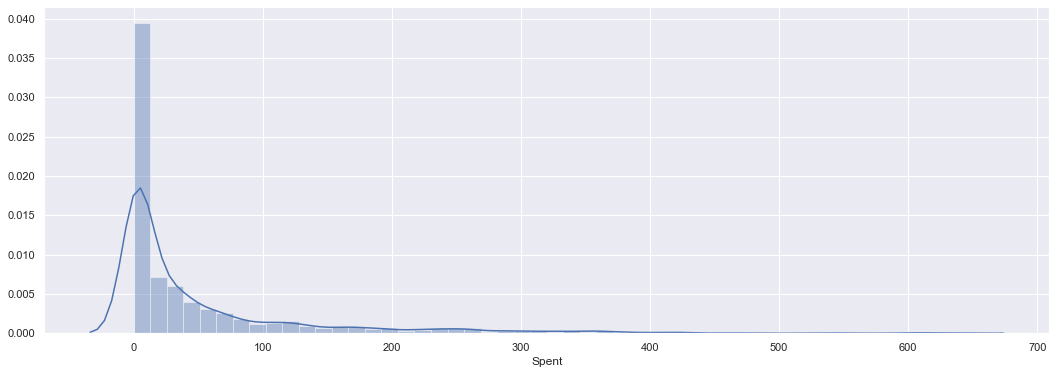

In [115]:
sns.distplot(df['Spent'])

# Correlations

In [1]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

### Clicks did not correlate well to conversions (lots of window shopping)

#### Most people did not have many conversions so it doesn't form a good regression

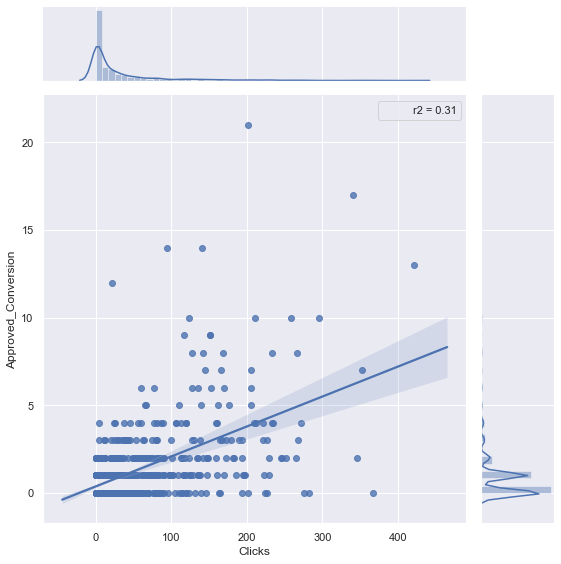

In [117]:
sns.jointplot(x="Clicks", y="Approved_Conversion", data=df, kind="reg", stat_func=r2, size=8)

### Similar result for impressions

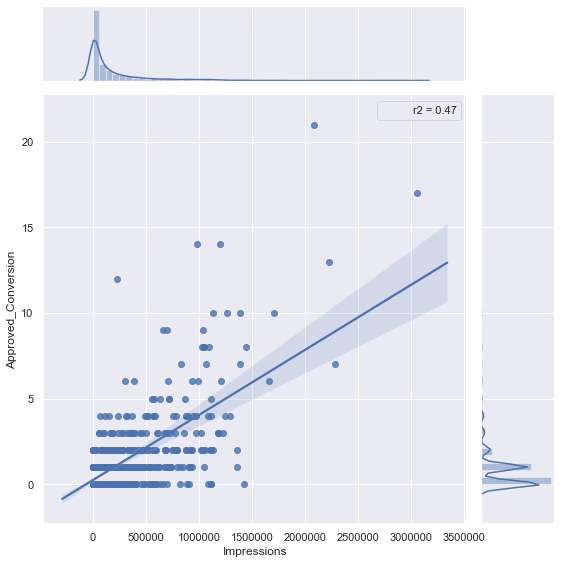

In [118]:
sns.jointplot(x="Impressions", y="Approved_Conversion", data=df, kind="reg", stat_func=r2, size=8)

### However, clicks did strongly correlate positively to spending

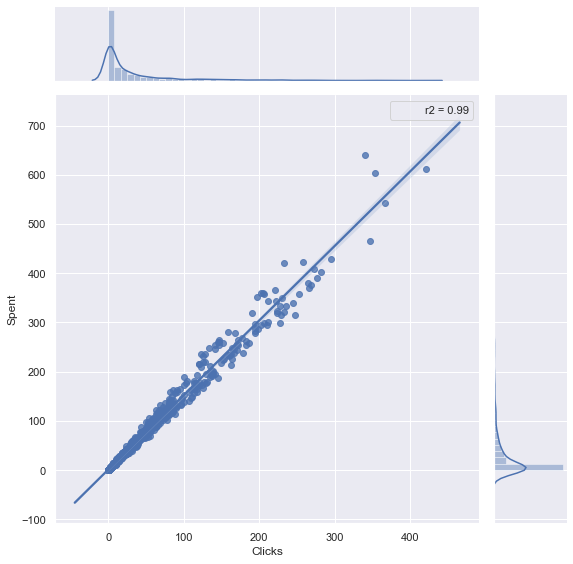

In [119]:
sns.jointplot(x="Clicks", y="Spent", data=df, kind="reg", stat_func=r2, size=8)

### And so did impressions

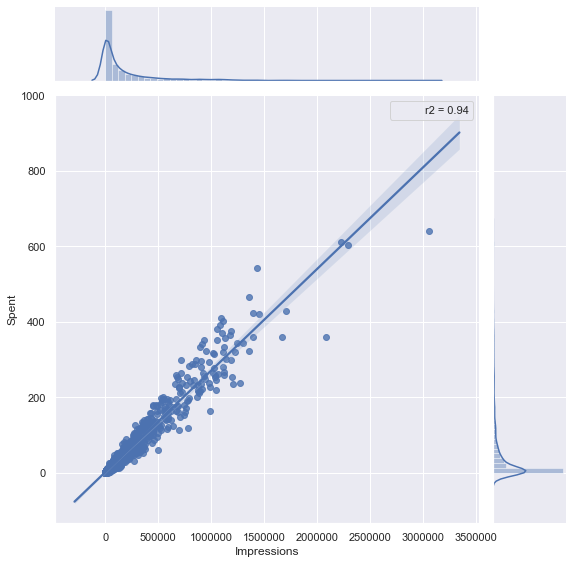

In [120]:
sns.jointplot(x="Impressions", y="Spent", data=df, kind="reg", stat_func=r2, size=8)

# Gender Demographics

### Males and females were close in ratio for the campaigns

Text(0, 0.5, 'Count')

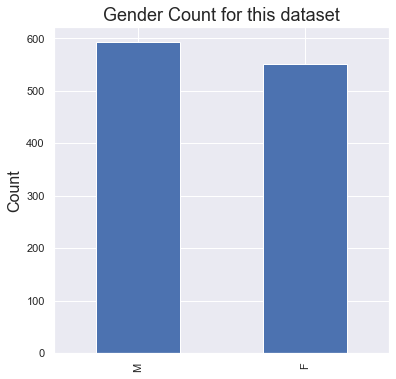

In [123]:
df['gender'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Gender Count for this dataset', fontsize=18)
plt.ylabel('Count', fontsize=16)

### Graph showing females spending more than males

Text(0, 0.5, 'Spending')

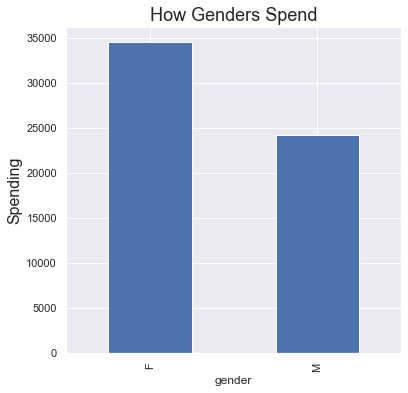

In [74]:
df.groupby("gender")['Spent'].sum().plot(kind='bar', figsize=(6,6))
plt.title('How Genders Spend', fontsize=18)
plt.ylabel('Spending', fontsize=16)

### Females click ads more than males

Text(0, 0.5, 'Clicks')

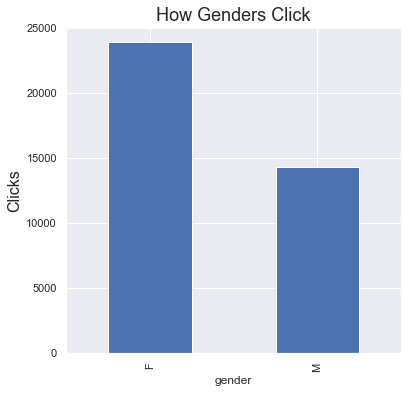

In [75]:
df.groupby("gender")['Clicks'].sum().plot(kind='bar', figsize=(6,6))
plt.title('How Genders Click', fontsize=18)
plt.ylabel('Clicks', fontsize=16)

### Males had more purchases even though less clicks and less spending

Text(0, 0.5, 'Approved Conversions')

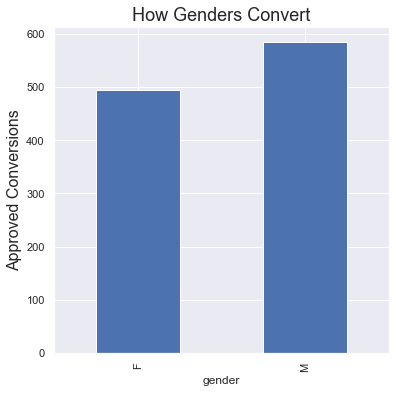

In [76]:
df.groupby("gender")['Approved_Conversion'].sum().plot(kind='bar', figsize=(6,6))
plt.title('How Genders Convert', fontsize=18)
plt.ylabel('Approved Conversions', fontsize=16)

# Age demographics

### 30-34 year olds were the largest demographic

Text(0, 0.5, 'Count')

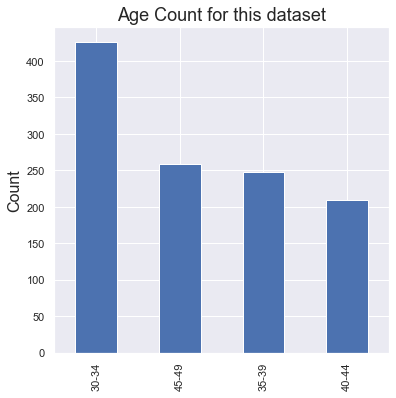

In [78]:
df['age'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Age Count for this dataset', fontsize=18)
plt.ylabel('Count', fontsize=16)

### 45-49 year olds spent the most, despite being a smaller group (almost half 30-34!)

Text(0, 0.5, 'Spending')

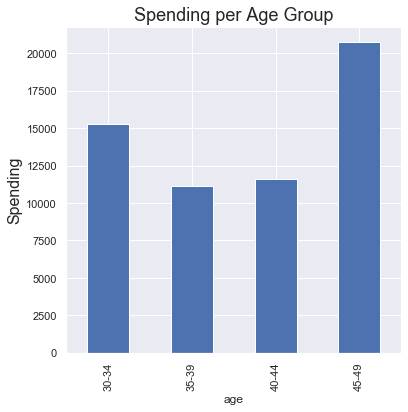

In [79]:
df.groupby("age")['Spent'].sum().plot(kind='bar', figsize=(6,6))
plt.title('Spending per Age Group', fontsize=18)
plt.ylabel('Spending', fontsize=16)

### 45-49 year olds had the most clicks

Text(0, 0.5, 'Clicks')

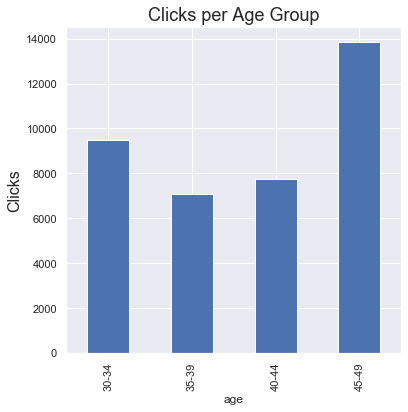

In [80]:
df.groupby("age")['Clicks'].sum().plot(kind='bar', figsize=(6,6))
plt.title('Clicks per Age Group', fontsize=18)
plt.ylabel('Clicks', fontsize=16)

### 30-34 year olds had the most conversions, so they spent less money per conversion

Text(0, 0.5, 'Approved Conversions')

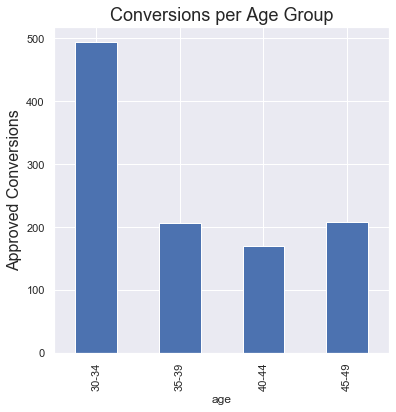

In [81]:
df.groupby("age")['Approved_Conversion'].sum().plot(kind='bar', figsize=(6,6))
plt.title('Conversions per Age Group', fontsize=18)
plt.ylabel('Approved Conversions', fontsize=16)

## Campaign success

### Xyz campaign id 1178 had the most success in terms of conversions and spending

Text(0, 0.5, 'Count')

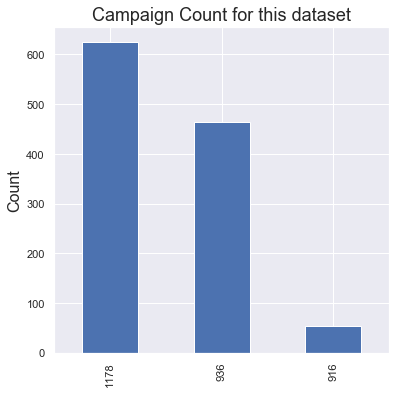

In [82]:
df['xyz_campaign_id'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Campaign Count for this dataset', fontsize=18)
plt.ylabel('Count', fontsize=16)

Text(0, 0.5, 'Clicks')

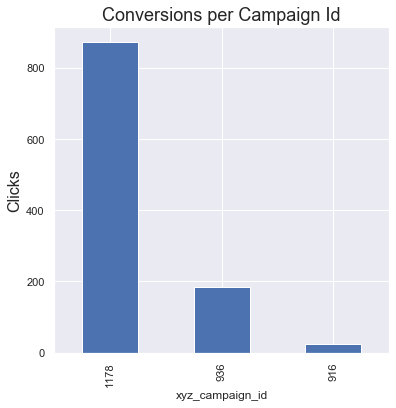

In [124]:
df.groupby("xyz_campaign_id")['Approved_Conversion'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(6,6))
plt.title('Conversions per Campaign Id', fontsize=18)
plt.ylabel('Clicks', fontsize=16)

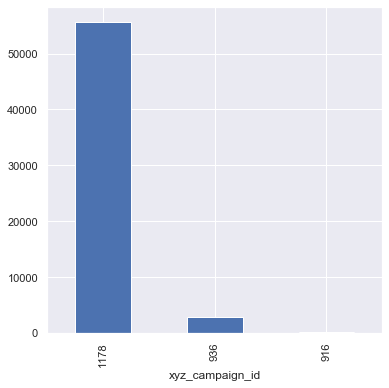

In [125]:
df.groupby("xyz_campaign_id")['Spent'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(6,6))